<a href="https://colab.research.google.com/github/liyanauk/CognoRise-Infotech/blob/main/task2_Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TITANIC SURVIVAL PREDICTION**

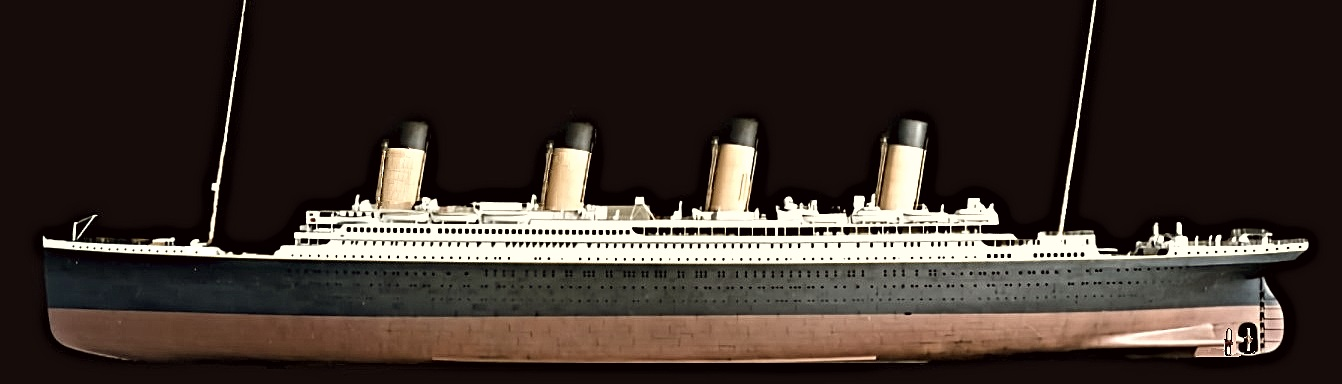

In [239]:
#import necessary libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

#loading the dataset
df=pd.read_csv('/content/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [240]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [241]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [242]:
#columns and row counts
print("columns_count: ",df.shape[1])
print("row_count: ",df.shape[0])

columns_count:  12
row_count:  418


In [243]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [244]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [245]:
#generate a statistical summary of the dataframe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [247]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [248]:
#to replace missing value
age=df['Age'].mean()
age

30.272590361445783

In [249]:
df['Age'].fillna(age,inplace=True)

In [250]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [251]:
#Dropping Unwanted Columns

df=df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.50000,0,0,7.8292,Q
1,1,3,female,47.00000,1,0,7.0000,S
2,0,2,male,62.00000,0,0,9.6875,Q
3,0,3,male,27.00000,0,0,8.6625,S
4,1,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,30.27259,0,0,8.0500,S
414,1,1,female,39.00000,0,0,108.9000,C
415,0,3,male,38.50000,0,0,7.2500,S
416,0,3,male,30.27259,0,0,8.0500,S


In [252]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Text(0.5, 1.0, 'Survived graph')

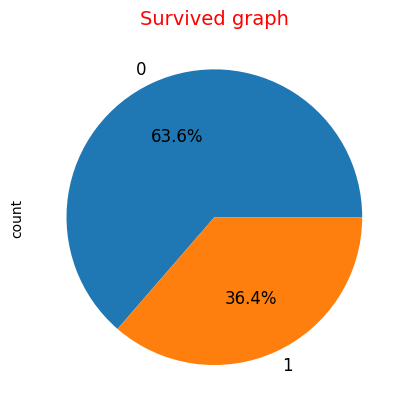

In [253]:
survived=df['Survived'].value_counts()
survived.plot(kind='pie',fontsize=12,autopct='%1.1f%%')
plt.title('Survived graph',color='red',fontsize=14)

Text(0.5, 1.0, 'Pclass graph')

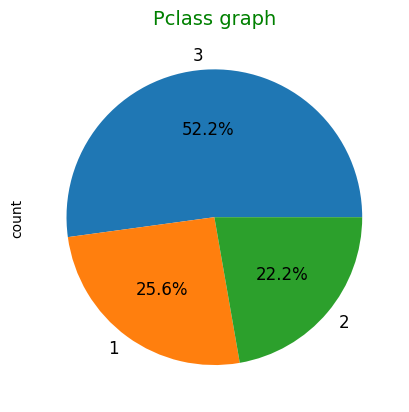

In [254]:
pclass=df['Pclass'].value_counts()
pclass.plot(kind='pie',fontsize=12,autopct='%1.1f%%')
plt.title('Pclass graph',color='green',fontsize=14)

Text(0.5, 1.0, 'Gender graph')

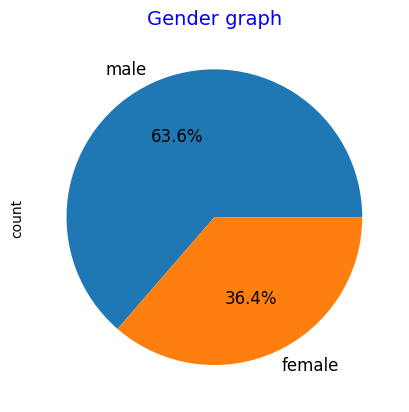

In [255]:
gender=df['Sex'].value_counts()
gender.plot(kind='pie',fontsize=12,autopct='%1.1f%%')
plt.title('Gender graph',color='blue',fontsize=14)

<Axes: xlabel='Survived', ylabel='count'>

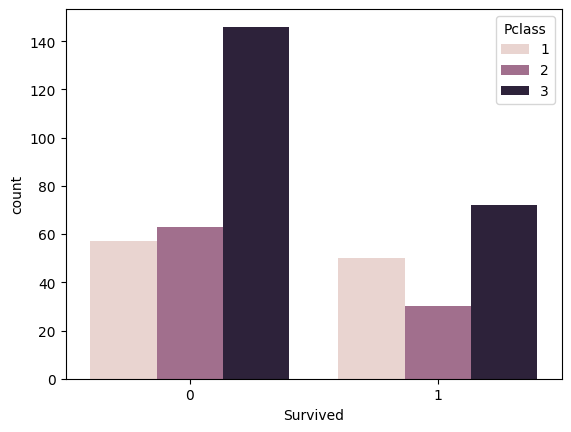

In [256]:
sns.countplot(x=df['Survived'],hue=df['Pclass'])

<Axes: xlabel='Sex', ylabel='count'>

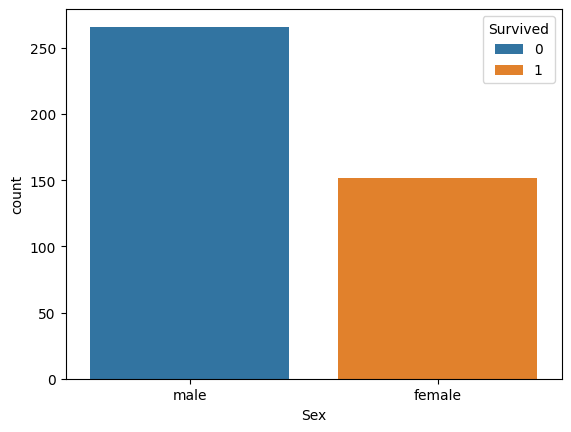

In [257]:
sns.countplot(x=df['Sex'],hue=df['Survived'])

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


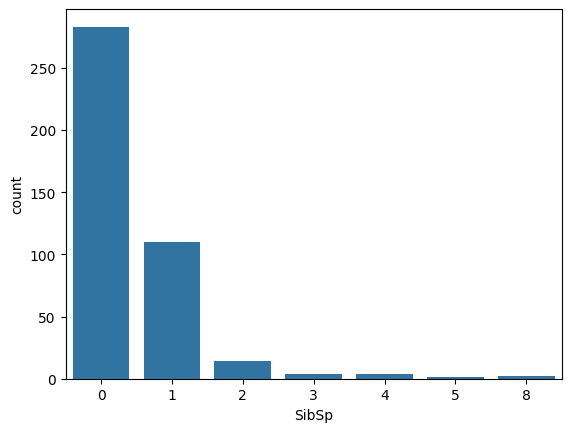

In [258]:
print(df['SibSp'].value_counts())
print(sns.countplot(x=df['SibSp'],data=df))

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


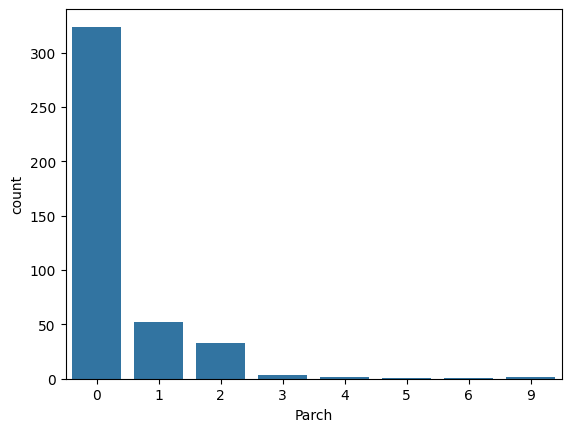

In [259]:
print(df['Parch'].value_counts())
print(sns.countplot(x=df['Parch'],data=df))

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


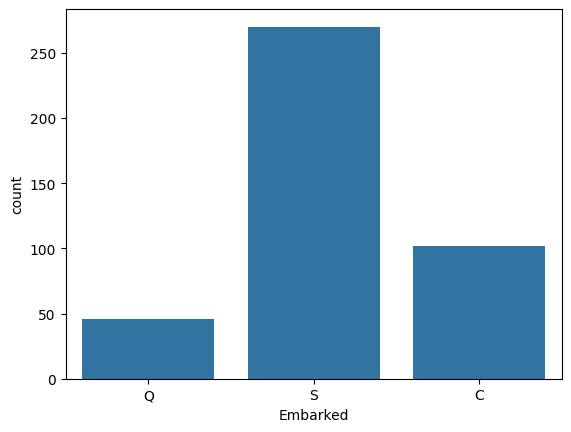

In [260]:
print(df['Embarked'].value_counts())
print(sns.countplot(x=df['Embarked'],data=df))

In [261]:
#preprocessing

from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Sex']=lab.fit_transform(df['Sex'])
df['Embarked']=lab.fit_transform(df['Embarked'])

<Axes: >

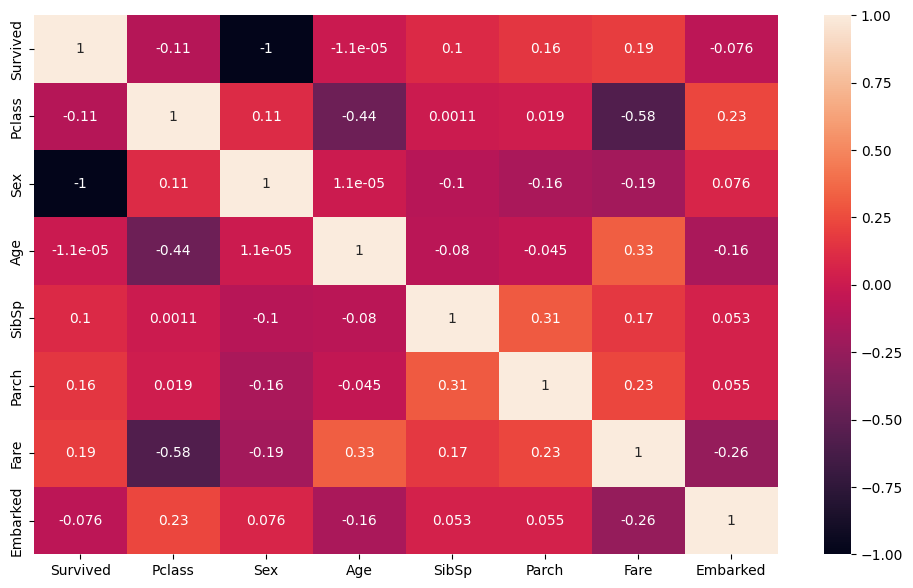

In [262]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

In [263]:
#seperate x and y

x=df.drop(['Survived'],axis=1).values
x

array([[ 3.        ,  1.        , 34.5       , ...,  0.        ,
         7.8292    ,  1.        ],
       [ 3.        ,  0.        , 47.        , ...,  0.        ,
         7.        ,  2.        ],
       [ 2.        ,  1.        , 62.        , ...,  0.        ,
         9.6875    ,  1.        ],
       ...,
       [ 3.        ,  1.        , 38.5       , ...,  0.        ,
         7.25      ,  2.        ],
       [ 3.        ,  1.        , 30.27259036, ...,  0.        ,
         8.05      ,  2.        ],
       [ 3.        ,  1.        , 30.27259036, ...,  1.        ,
        22.3583    ,  0.        ]])

In [264]:
y=df['Survived'].values
y

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [265]:
#train-test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[  1.        ,   1.        ,  36.        , ...,   0.        ,
         75.2417    ,   0.        ],
       [  3.        ,   1.        ,  30.27259036, ...,   0.        ,
          7.75      ,   1.        ],
       [  1.        ,   0.        ,  63.        , ...,   0.        ,
        221.7792    ,   2.        ],
       ...,
       [  1.        ,   1.        ,  46.        , ...,   0.        ,
         75.2417    ,   0.        ],
       [  2.        ,   1.        ,  24.        , ...,   0.        ,
         13.5       ,   2.        ],
       [  3.        ,   1.        ,  30.27259036, ...,   0.        ,
          7.75      ,   1.        ]])

In [266]:
x_test

array([[3.00000000e+00, 1.00000000e+00, 2.50000000e+01, 0.00000000e+00,
        0.00000000e+00, 7.22920000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 3.90000000e+01, 0.00000000e+00,
        0.00000000e+00, 2.11337500e+02, 2.00000000e+00],
       [3.00000000e+00, 1.00000000e+00, 2.10000000e+01, 0.00000000e+00,
        0.00000000e+00, 7.75000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.00000000e+00, 3.50000000e+01, 0.00000000e+00,
        0.00000000e+00, 7.89580000e+00, 2.00000000e+00],
       [3.00000000e+00, 0.00000000e+00, 3.60000000e+01, 0.00000000e+00,
        2.00000000e+00, 1.21833000e+01, 2.00000000e+00],
       [2.00000000e+00, 1.00000000e+00, 5.00000000e+01, 1.00000000e+00,
        0.00000000e+00, 2.60000000e+01, 2.00000000e+00],
       [3.00000000e+00, 0.00000000e+00, 2.90000000e+01, 0.00000000e+00,
        0.00000000e+00, 7.92500000e+00, 2.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 4.90000000e+01, 0.00000000e+00,
        0.00000000e+00, 2

In [267]:
y_train

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0])

In [268]:
y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [269]:
#Normalization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [270]:
#model creation and Performance Evaluation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
knn=KNeighborsClassifier(n_neighbors=7)
naive=GaussianNB()
svm=SVC()
lst=[knn,naive,svm]

In [271]:
for i in lst:
  print("Model is",i)
  i.fit(x_train,y_train)
  print(" "*100)

  y_pred=i.predict(x_test)
  print('Prediction Result is',y_pred)
  print(" "*100)

  acc=accuracy_score(y_test,y_pred)
  print('accuracy_score is',acc)
  print(" "*100)

  score=classification_report(y_test,y_pred)
  print('classification_report is',score)
  print(" "*100)




  print("*"*200)


Model is KNeighborsClassifier(n_neighbors=7)
                                                                                                    
Prediction Result is [0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0]
                                                                                                    
accuracy_score is 1.0
                                                                                                    
classification_report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



[[85  0]
 [ 1 40]]


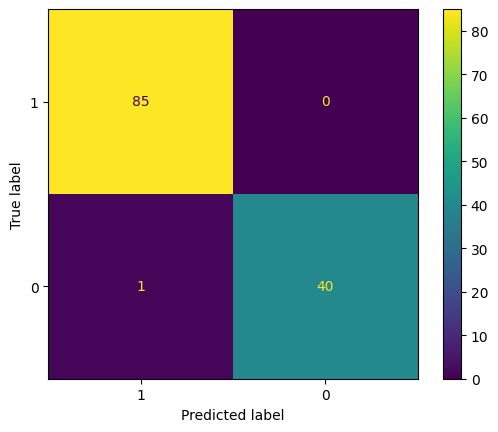

In [272]:
cmd=confusion_matrix(y_test,y_pred)
lab=[1,0]
cmd1=ConfusionMatrixDisplay(cmd,display_labels=lab)
cmd1.plot()
print(cmd)